In [2]:
import mido 
import pretty_midi as pm

# WebScraping the Midi Files 

In [3]:
# This project will focus on using data from one song but can possibly be scaled using web scraping

In [4]:
#from bs4 import BeautifulSoup as bs
#import requests 

In [5]:
#with open('http://www.jsbach.net/midi/midi_artoffugue.html') as 

# Extracting midi data from a MIDI file

In [6]:
filename      = 'C:/Users/elija/Documents/Homework Fall (2020)/EAS 503/project/stage-1-the-jungle-.mid'
#filename2    = 'C:/Users/elija/Documents/Homework Fall (2020)/EAS 503/project/bwv582.mid'
#filename3    = 'C:/Users/elija/Documents/Homework Fall (2020)/EAS 503/project/boss-battle.mid'
#filename4    = 'C:/Users/elija/Documents/Homework Fall (2020)/EAS 503/project/bwv0243.mid'
mido.MidiFile(filename)

<midi file 'C:/Users/elija/Documents/Homework Fall (2020)/EAS 503/project/stage-1-the-jungle-.mid' type 1, 5 tracks, 6850 messages>

In [7]:
# iterating over the midi file can extract midi messages
def message_extractor(filename):
    
    midi_track = mido.MidiFile(filename) # opens midi file 
    messages = []
    message = ''
    for msg in midi_track:
        if not msg.is_meta:
            messages.append(str(msg).split())
    return(messages)

def parser(messages):
    for i in range(len(messages)):
        if messages[i][0] == "note_on":
            messages[i][0] = 1
        elif messages[i][0] == "note_off":
            messages[i][0] = 0
    for i in range(len(messages)):
        if messages[i][1].startswith('channel') == True: 
            messages[i][1] = int(messages[i][1].strip('channel='))
    for i in range(len(messages)):
        if messages[i][2].startswith('note') == True: 
            messages[i][2] = int(messages[i][2].strip('note='))
    for i in range(len(messages)):
        if messages[i][3].startswith('velocity') == True: 
            messages[i][3] = int(messages[i][3].strip('velocity='))
    for i in range(len(messages)):
        if len(messages[i]) == 5:
            if messages[i][4].startswith('time') == True:
                messages[i][4] = float(messages[i][4].strip('time='))
                messages[i][4] = round(messages[i][4], 2)
    return(messages)

In [8]:
messages = message_extractor(filename) # extracts messages from midi file

In [9]:
messages # display messages

[['program_change', 'channel=0', 'program=80', 'time=0'],
 ['control_change', 'channel=0', 'control=7', 'value=127', 'time=0'],
 ['note_on', 'channel=0', 'note=72', 'velocity=80', 'time=0'],
 ['program_change', 'channel=1', 'program=80', 'time=0'],
 ['control_change', 'channel=1', 'control=7', 'value=127', 'time=0'],
 ['note_on', 'channel=1', 'note=77', 'velocity=80', 'time=0'],
 ['program_change', 'channel=2', 'program=80', 'time=0'],
 ['control_change', 'channel=2', 'control=7', 'value=127', 'time=0'],
 ['note_on', 'channel=2', 'note=65', 'velocity=80', 'time=0'],
 ['control_change', 'channel=9', 'control=7', 'value=127', 'time=0'],
 ['note_off',
  'channel=0',
  'note=72',
  'velocity=64',
  'time=0.07999999999999999'],
 ['note_off', 'channel=1', 'note=77', 'velocity=64', 'time=0'],
 ['note_on',
  'channel=0',
  'note=70',
  'velocity=80',
  'time=0.019999999999999997'],
 ['note_on', 'channel=1', 'note=75', 'velocity=80', 'time=0'],
 ['note_off', 'channel=2', 'note=65', 'velocity=64

# Parsing Midi Messages and putting it into a data frame. 

In [11]:
import pandas as pd

In [12]:
parsed_messages = parser(messages)

In [13]:
MIDIData = pd.DataFrame(parsed_messages[14:])
MIDIData.columns = ['note stat', 'channel', 'pitch', 'velocity', 'time'] # renames coulumn headers 
MIDIData.head()
#MIDIData

,note stat,channel,pitch,velocity,time
0,0,2,65,64,0.00
1,1,2,63,80,0.00
2,0,0,70,64,0.08
3,0,1,75,64,0.00
4,1,0,67,80,0.02


# Filtering based on channel

The chords and melody are split into channels appplying the model of over the all the channels at once wouldn't necessary  

In [14]:
channel_0_midi = MIDIData[MIDIData.channel.isin(["0"])] # not empty channel
channel_1_midi = MIDIData[MIDIData.channel.isin(["1"])] # not empty channel
channel_2_midi = MIDIData[MIDIData.channel.isin(["2"])] # not empty channel 
channel_3_midi = MIDIData[MIDIData.channel.isin(["3"])] # empty channel
channel_4_midi = MIDIData[MIDIData.channel.isin(["4"])] # empty channel 
channel_5_midi = MIDIData[MIDIData.channel.isin(["5"])] # empty channel 
channel_6_midi = MIDIData[MIDIData.channel.isin(["6"])] # empty channel 
channel_7_midi = MIDIData[MIDIData.channel.isin(["7"])] # empty channel 
channel_8_midi = MIDIData[MIDIData.channel.isin(["8"])] # empty channel 
channel_9_midi = MIDIData[MIDIData.channel.isin(["9"])] # not empty channel

In [15]:
channel_0_midi # channel 0 holds the main melody 

,note stat,channel,pitch,velocity,time
2,0,0,70,64,0.08
4,1,0,67,80,0.02
8,0,0,67,64,0.08
10,1,0,65,80,0.02
14,0,0,65,64,0.08
...,...,...,...,...,...
6803,0,0,63,64,0.02
6807,1,0,65,80,0.02
6811,0,0,65,64,0.02
6815,1,0,67,80,0.02


# Analysis and Graphing 

# Determing the key of the song 

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

C:\Users\elija\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pitch', ylabel='count'>

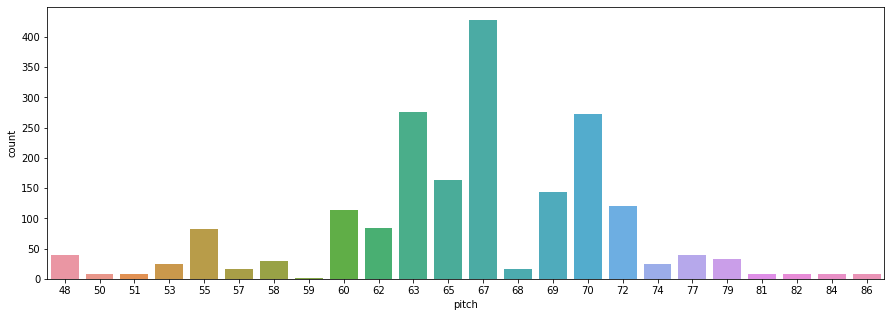

In [17]:
plt.figure(figsize = (15,5))
sns.countplot(channel_0_midi['pitch'])

In channel zero which is the channel that contains the melody or the main motif of the song we see that the is almost a normal distribtion around the midi note  number 67 which is a G so we should see the generated note out put a lot of notes around C. Additionally the second higest note is 63 and 70 which is an E flat and Bflat which suggest the song may be in C minor or a mode associated with Cminor. 

In [18]:
note_count = {}
note_count['C'] = 0
note_count['C#']= 0
note_count['D'] = 0
note_count['D#']= 0
note_count['E'] = 0
note_count['F'] = 0
note_count['F#']= 0
note_count['G'] = 0
note_count['G#']= 0
note_count['A'] = 0
note_count['A#']= 0
note_count['B'] = 0

for i in MIDIData['pitch']:
    if  i %12 == 0:
        note_count['C'] = note_count['C']+  1 
    elif  i %12 == 1:
        note_count['C#'] = note_count['C#'] + 1 
    elif  i %12 == 2:
        note_count['D'] = note_count['D'] + 1 
    elif  i %12 == 3:
        note_count['D#'] = note_count['D#'] +1
    elif  i %12 == 4:
        note_count['E'] = note_count['E'] +1
    elif  i %12 == 5:
        note_count['F'] = note_count['F'] +1
    elif  i %12 == 6:
        note_count['F#'] =note_count['F#'] + 1
    elif  i %12 == 7:
        note_count['G'] = note_count['G'] +1
    elif  i %12 == 8:
        note_count['G#'] = note_count['G#'] + 1
    elif  i %12 == 9:
        note_count['A'] = note_count['A'] +1
    elif  i %12 == 10:
        note_count['A#'] = note_count['A#'] + 1
    elif  i %12 == 11:
        note_count['B'] =  note_count['B'] +1

C:\Users\elija\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

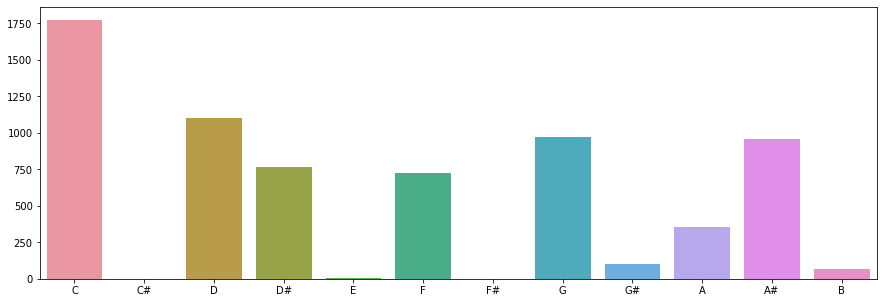

In [19]:
plt.figure(figsize = (15,5))
sns.barplot(list(note_count.keys()),list(note_count.values()))

With C being the most played note we can assume that scale from which the melody is constructed from is some musical mode of C and given that we have D#, G#, A# (Eb,Ab,Bb) being played often and these notes make the key signature of of Eb major we can then conclude that the scale being used to make the melody is C natural minor.

# Charting Time or Rhythm

C:\Users\elija\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='time', ylabel='count'>

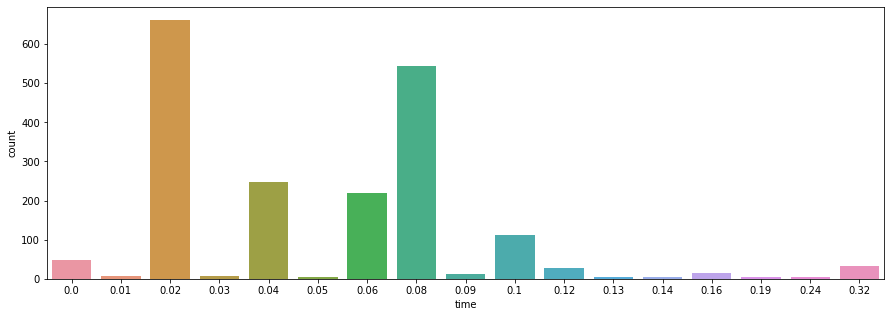

In [20]:
plt.figure(figsize = (15,5))
sns.countplot(channel_0_midi['time'])

Where pitch determines sound and time determines rhythm using a bigram on time will allow for the rhythm of the notes to vary accoring to the input song. 

# Predicting the Next notes

# How and N-gram model Works 

I this Exercise we will recreate/scramble a text based on then analyzed word frequencies of the text. The next word placed will depend on the previous word placed because the word placement if based of  conditional probability this notion can be summed up by the equation.

**(UNIGRAM)**$$P(A) = \frac{\#of apperences of the pitch}{ total number of pitches}$$

**(BIGRAM)**$$P(A|B)\cdot P(B) = P(A \cap B)$$

**(TRIGRAM)**$$P(A\cap B | C)\cdot P(C) = P(A \cap C)$$

Where**:**
- $P(A|B)$ is the conditional probability of A given B.
- $P(A \cap B) = P(A) \cdot P(B)$ is the probability of both events A and B occuring 
- and $P(B)$  is the probability of B occuring.

**Example:**

So then for example given the word probability of the frist word place is "65" (which is the most frequently occuring) is $3.03\%$ then the probability of the next word being "63" given that you begin a the word the is:

$$P("63"|"65") = \dfrac{P(A \cap B)}{P(B)} = P(A)=1.22\%$$

Then for the probability of those two sequences of word is $3.36\% \times (1.22\%) = 4.099\% $
(in this particular example A and B are independent of each other)

The N-Gram model u

In [21]:
import numpy as np
import random
# calculating transitions
from nltk import bigrams
from itertools import product

# Generating pitches with a unigram

In [22]:
# cacluating probabilities of a unigram
MIDI_list = list(channel_0_midi['pitch']) # list of notes in the midi file
unigram_prob = []
for i in range(36,87): 
    unigram_prob.append(list.count(MIDI_list, i)) # storing the count of how many notes occur

unigram_prob = np.array(unigram_prob)/len(MIDI_list)

unigram_prob 

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.02043945, 0.        , 0.00408789,
       0.00408789, 0.        , 0.01226367, 0.        , 0.04190087,
       0.        , 0.00817578, 0.01532959, 0.00102197, 0.05825243,
       0.        , 0.04292284, 0.14103219, 0.        , 0.08380174,
       0.        , 0.2187021 , 0.00817578, 0.07358201, 0.13949923,
       0.        , 0.06131834, 0.        , 0.01226367, 0.        ,
       0.        , 0.02043945, 0.        , 0.01635156, 0.        ,
       0.00408789, 0.00408789, 0.        , 0.00408789, 0.        ,
       0.00408789])

In [23]:
nwords = 200
word1  = np.random.choice(range(36,87), p = unigram_prob)
predicted_notes = []
for i in range(nwords):
    predicted_notes.append(word1)
    w     = MIDI_list[word1]
    word2 = random.choice(MIDI_list)
    word1 = word2
#predicted_notes # list of predicted pitches

C:\Users\elija\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\elija\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='pitch', ylabel='count'>

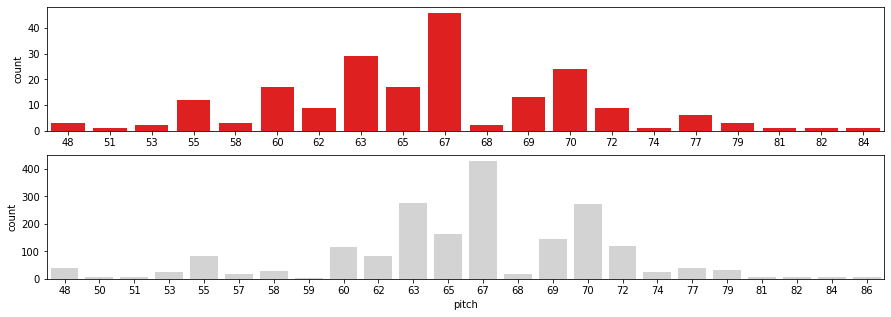

In [24]:
plt.figure(figsize = (15,5))
plt.subplot(2,1,1)
sns.countplot(predicted_notes,label = 'predicted notes',color = 'red')
plt.subplot(2,1,2)
sns.countplot(channel_0_midi['pitch'],label='orginal notes',color = 'lightgray')


We can see that the profile of the count of the orignal(in gray) is very similar to that of the predicted(in red) which tells us that the unigram model is doing a decent job of copying the distribtion of pitches of the input song and that 

# Generating pitches with a bigram model 

In [25]:
pair_list  = []
trans_prob = []
for i in bigrams(MIDI_list):
    pair_list.append(i)
for i in product(range(36,87),repeat = 2): # generating tuples
    trans_prob.append(list.count(pair_list, i)) # counting the number of 

trans_prob = np.array(trans_prob)
trans_prob = trans_prob/len(pair_list) # finding the frequency of each pitch
trans_prob

array([0.        , 0.        , 0.        , ..., 0.00204499, 0.        ,
       0.00204499])

In [26]:
pitch_trans  = {}
for i,j in zip(product(range(36,87),repeat = 2),range(0,len(trans_prob))):
    pitch_trans[i] = trans_prob[j]
#pitch_trans 

# Rhythm

Rhythm is detemine by the timing of the notes so in order to construct a predicted rhythm we need to bulid a model to predict the time column of the MIDI message. 

# Creating the Midi Track 

In [27]:
#new       = mido.MidiFile()
#new_track = mido.MidiTrack(())
#quadgram  = (note_on, channel, note_num,velocity, time)
#new_track.append(mido.Message(quadgram))

In [29]:
from mido import Message, MidiFile, MidiTrack

mid = MidiFile()
track = MidiTrack()
mid.tracks.append(track)

track.append(Message('program_change', program=12, time=0))
for i in predicted_notes:
    track.append(Message('note_on',note = i,channel = 0, time = 80))
    track.append(Message('note_off',note = i,channel = 0, time = 80))
mid.save('new_song.mid')

# MIDI is saved in new_song and can be played with windows media player